In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings 
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense 
import os

In [2]:
data_folder =os.path.join(os.getcwd(),"data")
data = os.path.join(data_folder,"bankloan.csv")
bank_df = pd.read_csv(data)
bank_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
bank_df = bank_df.dropna()
bank_df.isna().any()


Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [4]:
bank_df = bank_df.drop('Loan_ID',axis=1)
bank_df['LoanAmount'] = (bank_df['LoanAmount']*1000).astype(int)
Counter(bank_df['Loan_Status'])

Counter({'Y': 332, 'N': 148})

In [5]:
y_df = bank_df['Loan_Status']
X_df = bank_df.drop('Loan_Status', axis =1)
X_df = pd.get_dummies(X_df, drop_first = True)

In [6]:

y_df = y_df.apply(lambda x: 1 if x == 'Y' else 0)

In [7]:
smote = SMOTE(sampling_strategy = 'minority')
X,y = smote.fit_resample(X_df,y_df)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [9]:
classifier = Sequential()
classifier.add(Dense(200, activation = 'relu',kernel_initializer = 'random_normal', input_dim = X_test.shape[1]))
classifier.add(Dense(400, activation = 'relu', kernel_initializer = 'random_normal'))
classifier.add(Dense(5,   activation = 'relu', kernel_initializer = 'random_normal'))
classifier.add(Dense(1, activation  ='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer = 'adam',loss='binary_crossentropy' ,metrics = ['accuracy'])
classifier.fit(X_train,y_train, batch_size = 25, epochs =100 , verbose =1 )
evaluation = classifier.evaluate(X_train,y_train)
evaluation

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6076 - loss: 0.6908
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7309 - loss: 0.6657
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7618 - loss: 0.5867
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7319 - loss: 0.5176
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7631 - loss: 0.4795
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7879 - loss: 0.4485
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7882 - loss: 0.4334
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7784 - loss: 0.4646
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7689 - loss: 0.4528
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8027 - loss: 0.4375
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7628 - loss: 0.4623
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

[0.24289248883724213, 0.8879310488700867]

In [10]:
y_pred = np.around(classifier.predict(X_test),2)
y_pred = (y_pred > 0.63)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [11]:
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

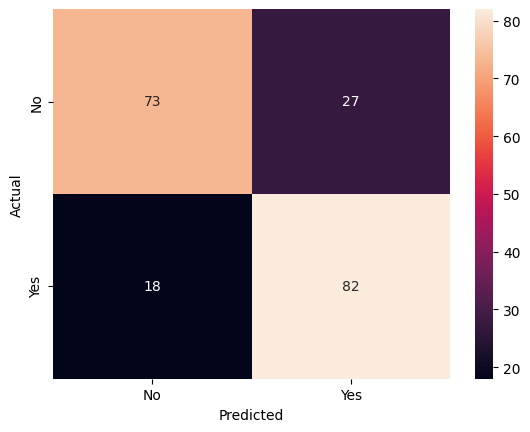

In [12]:
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot =True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])

##### from tensorflow.keras.wrappers.scikit_learn import KerasClassifier has been dedreciated in the newer versions of tensor flow so I had to use from scikeras.wrappers import KerasClassifier for my hyperparameter tuning and cross validation 

In [13]:
import numpy as np
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_classifier(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal', input_dim=X_train.shape[1]))
    classifier.add(Dense(800, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier)

parameters = {'batch_size': [10, 20, 30],
              'epochs': [50, 100],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10)

grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters: ", best_parameters)
print("Best Accuracy: ", best_accuracy)


ModuleNotFoundError: No module named 'scikeras'

In [26]:
pip install scikeras

     ---------------------------------------- 1.1/1.1 MB 32.1 kB/s eta 0:00:00
     --------------------------------------- 11.0/11.0 MB 35.8 kB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.1.post1
    Uninstalling scikit-learn-1.4.1.post1:
      Successfully uninstalled scikit-learn-1.4.1.post1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: C:\Users\Administrator\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


SyntaxError: invalid syntax (3374125308.py, line 1)